## Regresión

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


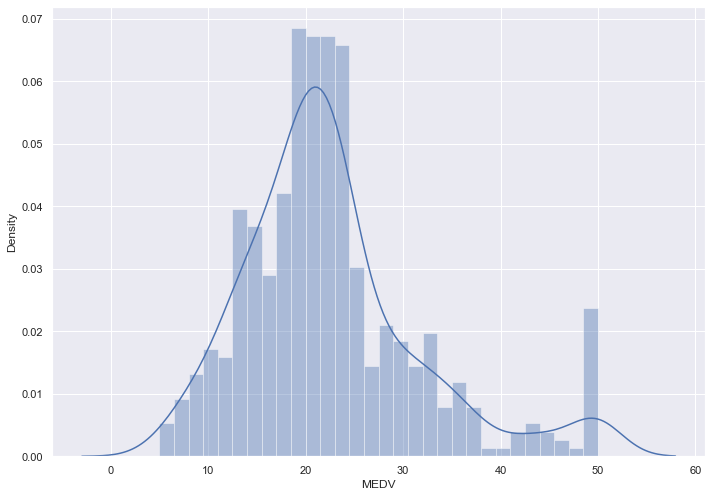


xEntrena:  (404, 4)
xPrueba:  (102, 4)
yEntrena:  (404,)
yPrueba:  (102,)
Performance del modelo (conjunto de entrenamiento):
MAE 3.697776810503952
MSE 28.109321562389837
RMSE 5.301822475563458
R error al cuadrado 0.672773386804643
***********************

Performance del modelo (conjunto de prueba):
MAE 3.695585453459722
MSE 24.274070518524727
RMSE 4.9268722855910045
R error al cuadrado 0.689962050410497


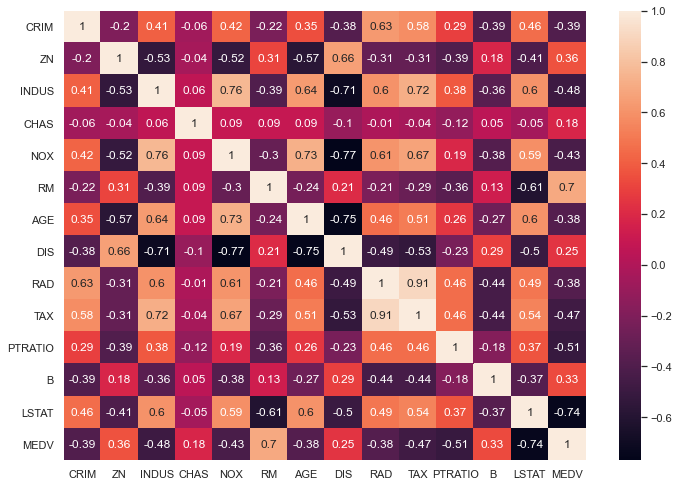

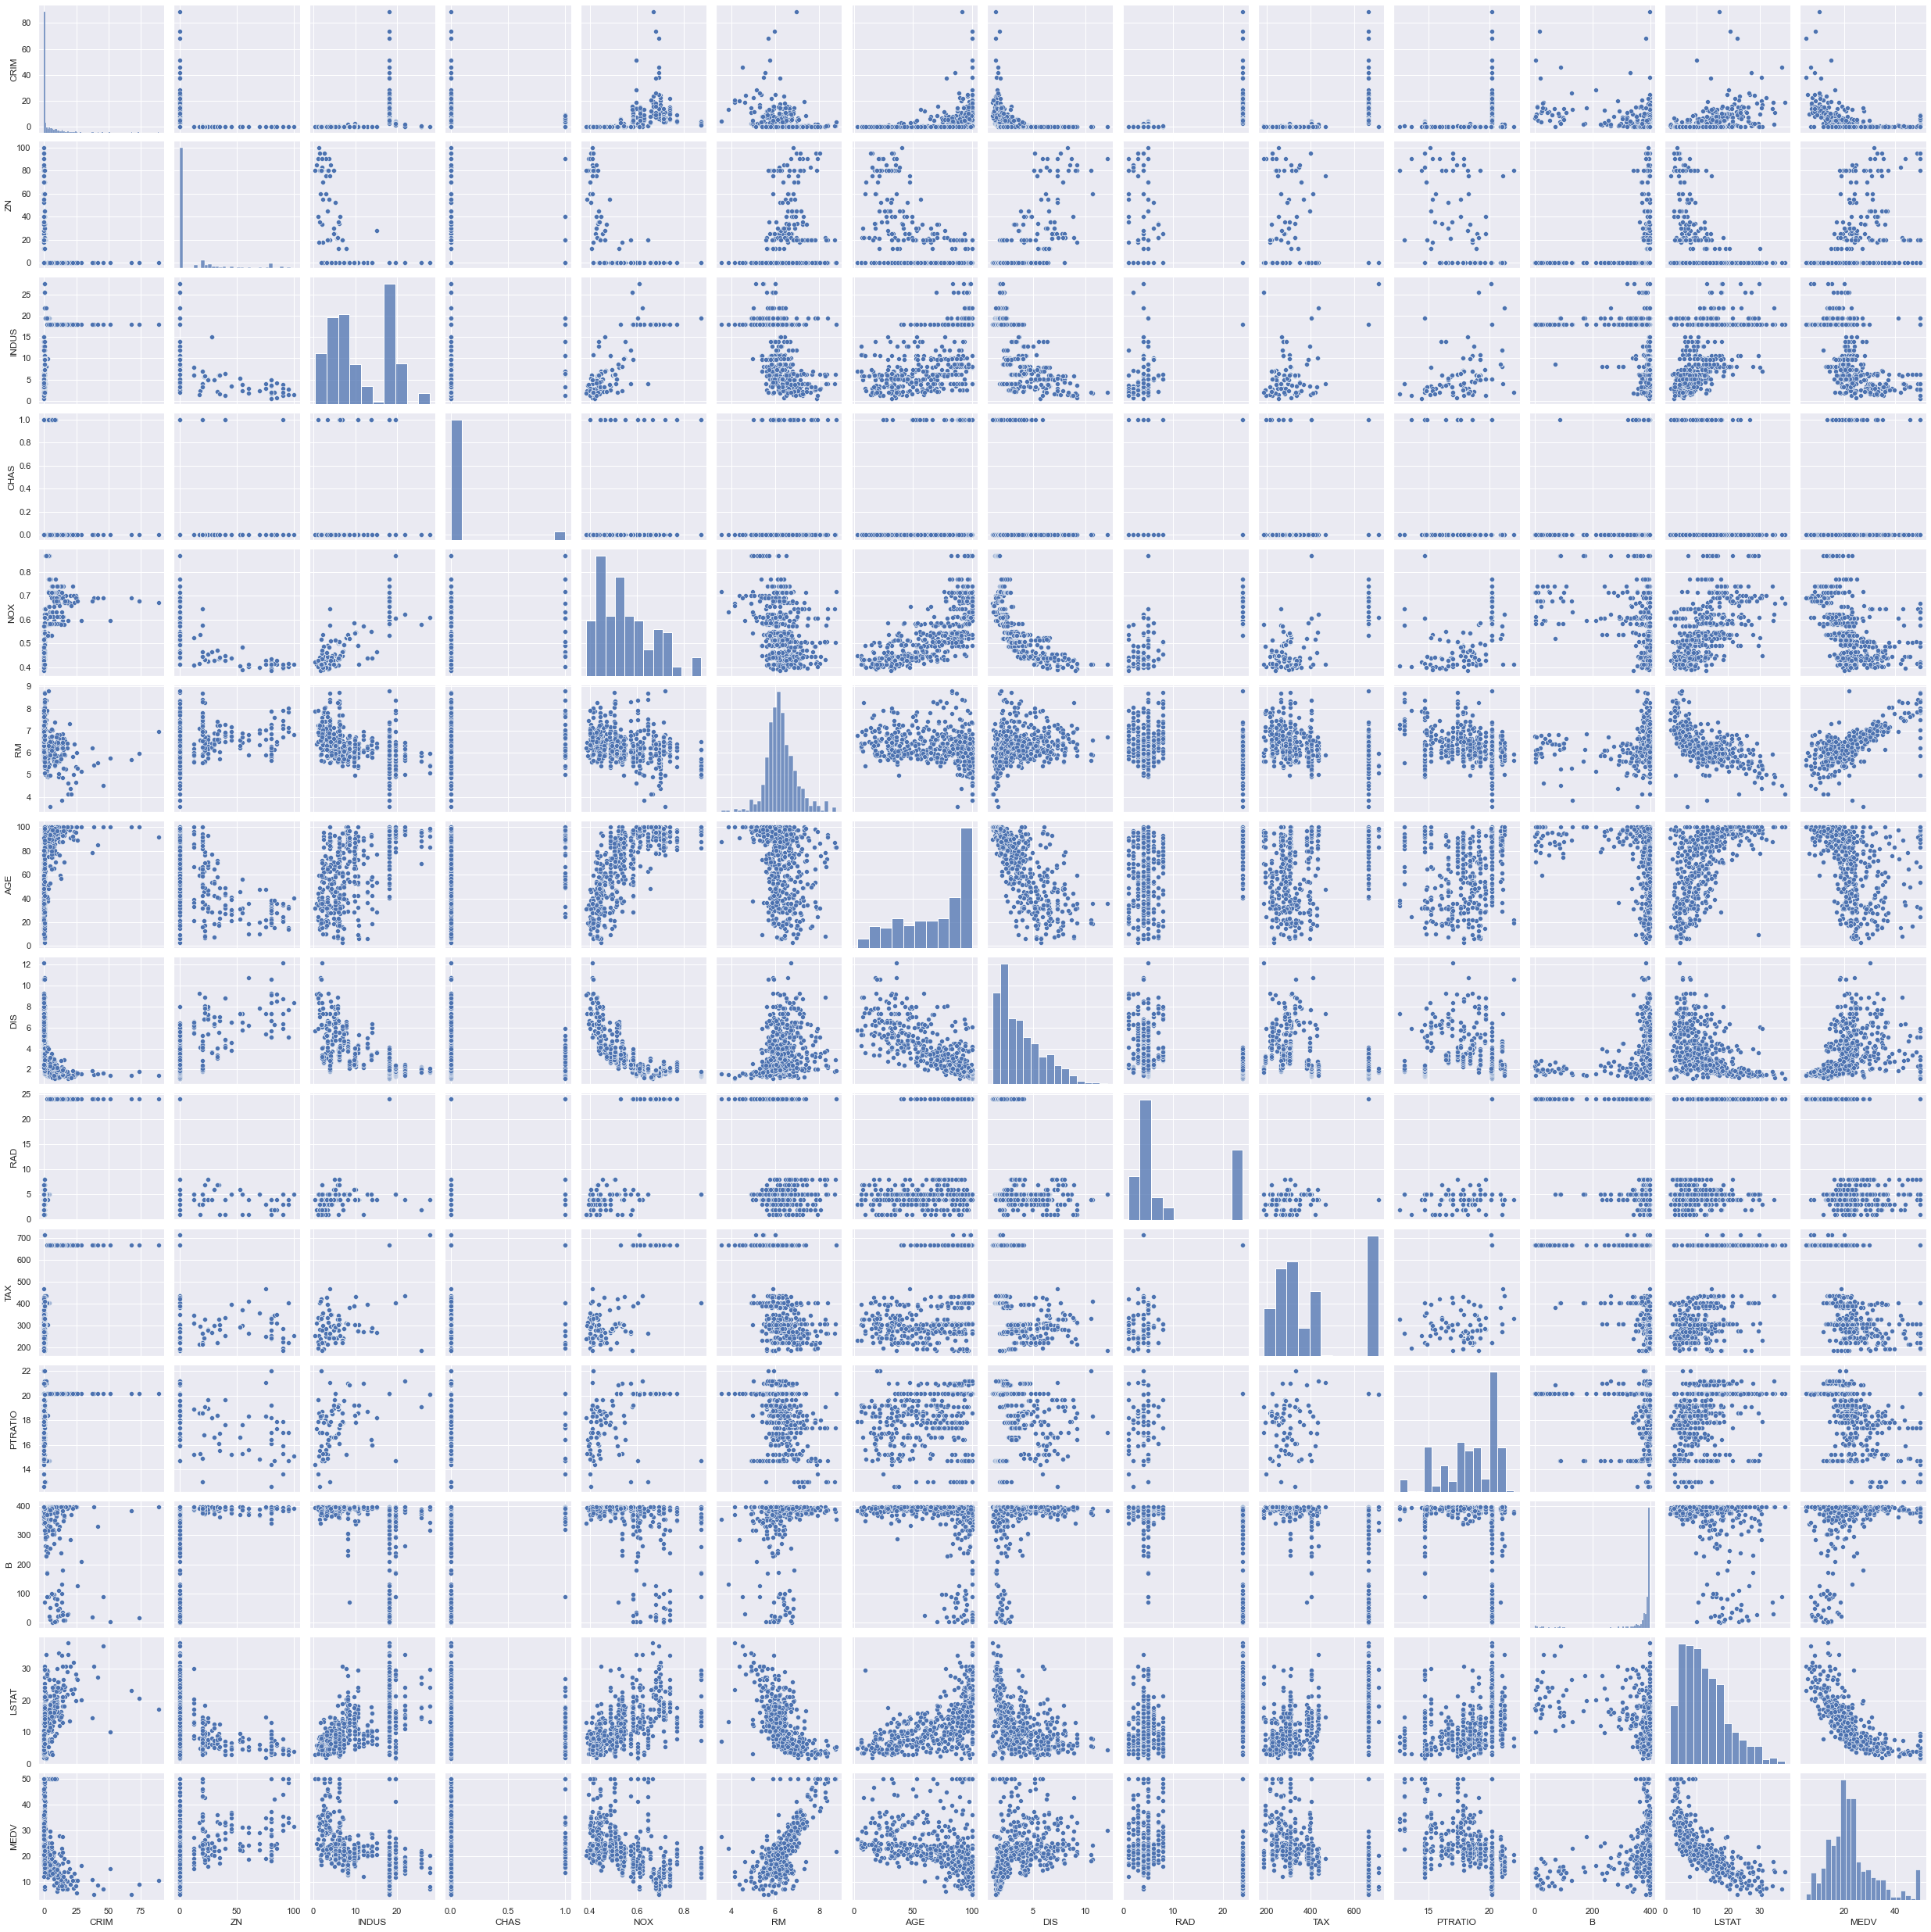

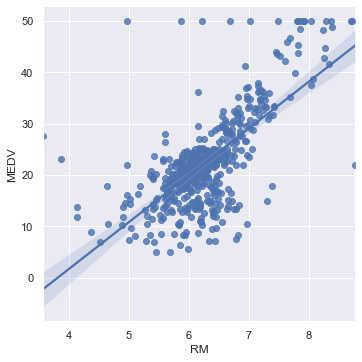

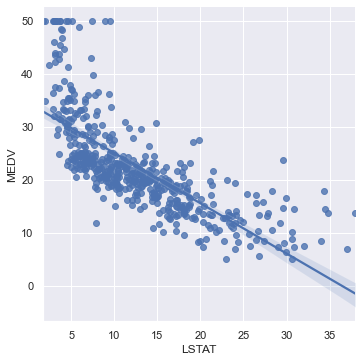

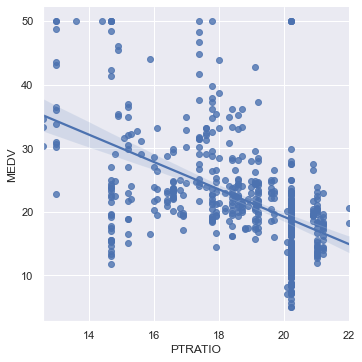

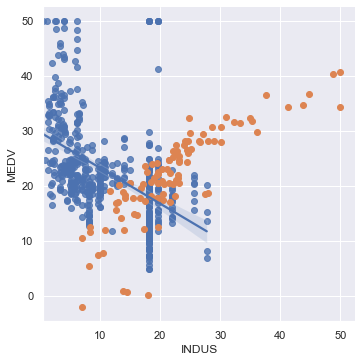

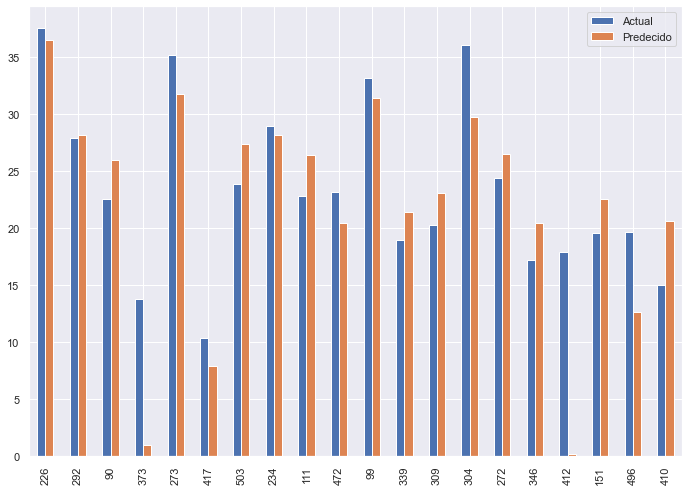

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Lectura de la boston housing dataset
from sklearn.datasets import load_boston
bd = load_boston ()

#Estructura de bd
print (bd.keys())

#Mayor información en DESCR
print (bd.DESCR)

#Lectura en un dataFrame
boston = pd.DataFrame(bd.data, columns=bd.feature_names)
boston.head()

#Creación de una nueva columna 
boston['MEDV'] = bd.target
boston.head ()

#Preprocesamiento
#Contar el número de valores faltantes
boston.isnull().sum()

"""Análisis exploratorio
Visualización para entender la relación entre la variable objetivo y el resto de las características
"""

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

"""Matriz de correlación para medir las relaciones lineales entre variables.
Se usan las funciones corr de pandas y heatmap de seaborn
Recordar que los valores cercanos a uno significan que están fuertemente relacionados, mientras que los cercanos al -1 tienen una fuerte correlación negativa.
"""

matrizCorrelación = boston.corr().round(2) 
print ()
sns.heatmap(data=matrizCorrelación,annot=True)#annot para valores adentro

"""Visualización de todas las variables"""

sns.pairplot(boston)

"""Con la matriz de correlación y las gráficas anteriores se seleccionan RM y LSTAT"""

sns.lmplot(x = 'RM', y = 'MEDV', data = boston)
sns.lmplot(x = 'LSTAT', y = 'MEDV', data = boston)
sns.lmplot(x = 'PTRATIO', y = 'MEDV', data = boston)
sns.lmplot(x = 'INDUS', y = 'MEDV', data = boston)

"""Preparación para entrenar el modelo"""

X = boston[['RM', 'LSTAT','PTRATIO','INDUS']]
y = boston['MEDV']
#80% para entrenar y 20% para prueba
from sklearn.model_selection import train_test_split
xEntrena, xPrueba, yEntrena, yPrueba = train_test_split(X, y, test_size=0.2, random_state=5)
print ('xEntrena: ', xEntrena.shape)
print ('xPrueba: ', xPrueba.shape)
print ('yEntrena: ', yEntrena.shape)
print ('yPrueba: ', yPrueba.shape)

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xEntrena, yEntrena)

#predicción
predicción = lm.predict(xPrueba)
plt.scatter(yPrueba,predicción)

#Valor predecido vs real
dfBoston = pd.DataFrame({'Actual': yPrueba, 'Predecido': predicción})
dfBoston.head(20)

#Graficación real vs predecido
dfBostonG = dfBoston.head(20)
dfBostonG.plot(kind = 'bar')

"""Evaluación del modelo"""

from sklearn import metrics
from sklearn.metrics import r2_score
print ("Performance del modelo (conjunto de entrenamiento):")
yEntrenaPredicción = lm.predict(xEntrena)
print('MAE', metrics.mean_absolute_error(yEntrena, yEntrenaPredicción))
print('MSE', metrics.mean_squared_error(yEntrena, yEntrenaPredicción))
print('RMSE', np.sqrt(metrics.mean_squared_error(yEntrena, yEntrenaPredicción)))
print('R error al cuadrado', r2_score(yEntrena, yEntrenaPredicción))
print ('***********************')
print ("\nPerformance del modelo (conjunto de prueba):")
print('MAE', metrics.mean_absolute_error(yPrueba, predicción))
print('MSE', metrics.mean_squared_error(yPrueba, predicción))
print('RMSE', np.sqrt(metrics.mean_squared_error(yPrueba, predicción)))
print('R error al cuadrado', r2_score(yPrueba, predicción))

## Regresión polinomial

(9, 1)
(1, 1)


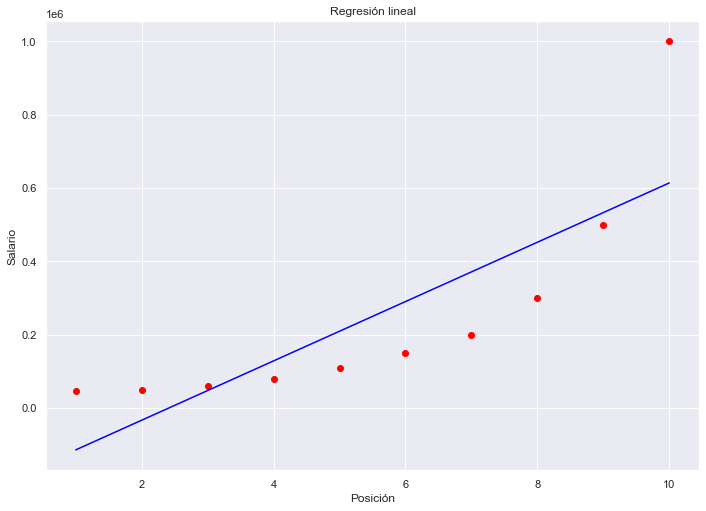

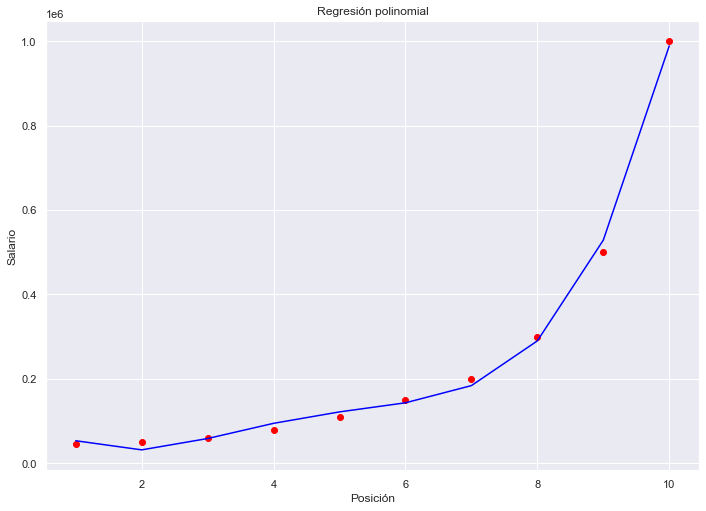

[249500.]
[132148.43750012]


In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lectura de la base de datos
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# Separación en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape)
print(X_test.shape)
#Regresión lineal
 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualización de los resultados de la regresión lineal
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Regresión lineal')
    plt.xlabel('Posición')
    plt.ylabel('Salario')
    plt.show()
    return
viz_linear()

#Regresión polinomial

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualización de los resultados de la regresión polinomial
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Regresión polinomial')
    plt.xlabel('Posición')
    plt.ylabel('Salario')
    plt.show()
    return
viz_polymonial()

#Predicción de un candidato con 5.5 años
# Con Regresión lineal
print(lin_reg.predict([[5.5]]))
#Salida debería ser 249500

# Con Regresión polinomial
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))
#Salida debería ser 132148.43750003

## Regresión Logistica

    gmat  gpa  experiencia  admitido
0    780  4.0            3         1
1    750  3.9            4         1
2    690  3.3            3         1
3    710  3.7            5         1
4    680  3.9            4         1
5    730  3.7            6         1
6    690  2.3            1         0
7    720  3.3            4         1
8    740  3.3            5         1
9    690  1.7            1         0
10   610  2.7            3         0
11   690  3.7            5         1
12   710  3.7            6         1
13   680  3.3            4         1
14   770  3.3            3         1
15   610  3.0            1         0
16   580  2.7            4         0
17   650  3.7            6         1
18   540  2.7            2         0
19   590  2.3            3         0
20   620  3.3            2         0
21   600  2.0            1         0
22   550  2.3            4         0
23   550  2.7            1         0
24   570  3.0            2         0
25   670  3.3            6         1
2

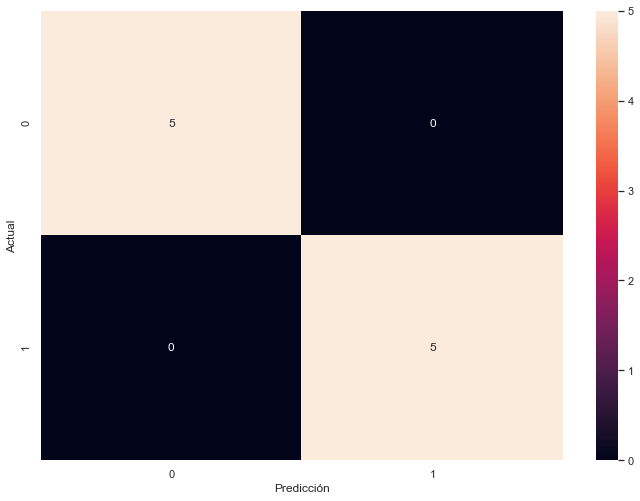

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import pandas as pd
candidatos = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'experiencia': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitido': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidatos,columns= ['gmat', 'gpa','experiencia','admitido'])
print (df)

"""Creación de una regresión logística"""

X = df[['gmat', 'gpa','experiencia']]
y = df['admitido']
#Separación en entrenamiento y prueba
XEntrena, XPrueba, yEntrena, yPrueba = train_test_split(X,y, test_size=0.25, random_state=0)
#Aplicación de la regresión logísitca
regLog = LogisticRegression()
regLog.fit(XEntrena,yEntrena)
yPred=regLog.predict(XPrueba)
#Matriz de confusión
matrizConf=pd.crosstab(yPrueba,yPred,rownames =['Actual'], colnames=['Predicción'])
sn.heatmap(matrizConf,annot=True)
print("Accurancy: ", metrics.accuracy_score(yPrueba, yPred))

"""Predicción con nuevos datos"""

candidatosNuevos = {'gmat': [590,740,680,610,710],
                    'gpa': [2,3.7,3.3,2.3,3],
                    'experiencia': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(candidatosNuevos,columns= ['gmat', 'gpa','experiencia'])
yPredNuevos=regLog.predict(df2)
print (df2)
print (yPredNuevos)